In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/MAGANG 2023/RFM_dataframe.xlsx')
df

,Email_Cust,Recency,Frequency,Monetary
0,07202023@spidi.my.id,216,1,8727264
1,0812ibnu@gmail.com,5,5,8646000
2,163202504@uii.ac.id,34,1,3000000
3,16sangadji@gmail.com,26,1,2925000
4,173220501@uii.ac.id,643,1,2200000
...,...,...,...,...
2878,zulkifliyusuf120@gmail.com,182,1,1100000
2879,zulkiflymuhammad@yahoo.co.id,419,1,12000000
2880,zulvyahfaisal@poliupg.ac.id,187,1,4225000
2881,zuma.yakuza@gmail.com,112,1,2975000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

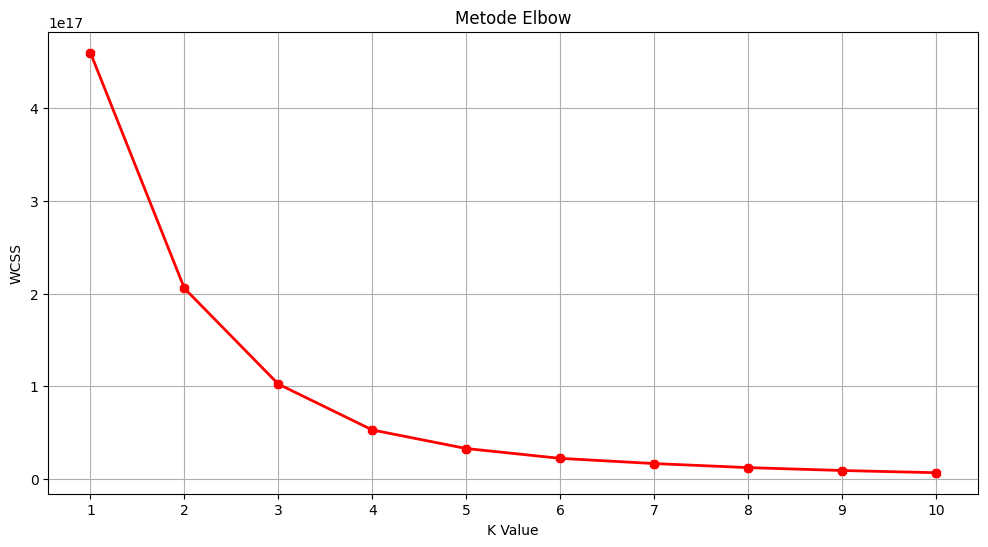

In [ ]:
#hitung Within Cluster Sum Of Squares (WCSS)
#WCSS mengukur total jarak antara pusat cluster dan data tujuannya memaksimalkan jumlah kluster

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title('Metode Elbow')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#elobow method untuk menetukan jumlah cluster
#ditemukan K paling optimal adalah 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

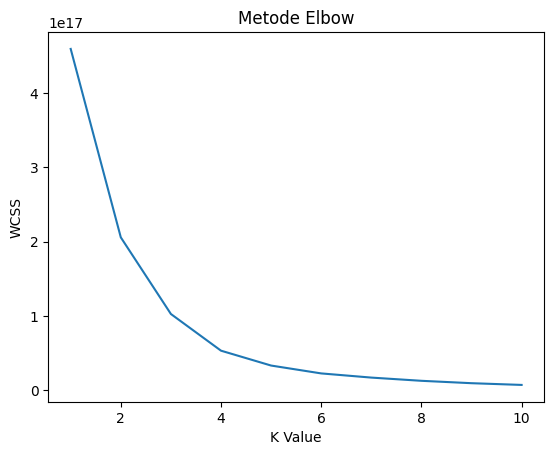

In [ ]:
#jika 2 dimensi
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

#elbow method dan K paling optimal adalah 2

In [ ]:
atribut = ['Recency', 'Frequency', 'Monetary']

In [ ]:
# Menormalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[atribut])

In [ ]:
# Menentukan jumlah cluster yang diinginkan
jumlah_cluster = 4

In [ ]:
# Menerapkan algoritma K-means
kmeans = KMeans(n_clusters=jumlah_cluster, random_state=42)
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
# Menambahkan label cluster ke data pelanggan
df['Cluster'] = kmeans.labels_

In [ ]:
# Menampilkan hasil clustering
print(df[['Recency', 'Frequency', 'Monetary', 'Cluster']])
df

      Recency  Frequency  Monetary  Cluster
0         216          1   8727264        0
1           5          5   8646000        0
2          34          1   3000000        0
3          26          1   2925000        0
4         643          1   2200000        3
...       ...        ...       ...      ...
2878      182          1   1100000        0
2879      419          1  12000000        0
2880      187          1   4225000        0
2881      112          1   2975000        0
2882      110          1   3473000        0

[2883 rows x 4 columns]


,Email_Cust,Recency,Frequency,Monetary,label,Cluster
0,07202023@spidi.my.id,216,1,8727264,1,0
1,0812ibnu@gmail.com,5,5,8646000,1,0
2,163202504@uii.ac.id,34,1,3000000,1,0
3,16sangadji@gmail.com,26,1,2925000,1,0
4,173220501@uii.ac.id,643,1,2200000,1,3
...,...,...,...,...,...,...
2878,zulkifliyusuf120@gmail.com,182,1,1100000,1,0
2879,zulkiflymuhammad@yahoo.co.id,419,1,12000000,0,0
2880,zulvyahfaisal@poliupg.ac.id,187,1,4225000,1,0
2881,zuma.yakuza@gmail.com,112,1,2975000,1,0


In [ ]:
# Define rfm_level function
def Cluster(df):
    if df['Cluster'] == 4:
        return "Can't Loose Them"
    elif ((df['Cluster'] == 3)):
        return 'Loyal'
    elif ((df['Cluster'] == 2)):
        return 'Potential'
    else:
        return 'Require Activation'

In [ ]:
# Create a new variable RFM_Level
df['RFM_Level'] = df.apply(Cluster, axis=1)
df

,Email_Cust,Recency,Frequency,Monetary,label,Cluster,RFM_Level
0,07202023@spidi.my.id,216,1,8727264,1,0,Require Activation
1,0812ibnu@gmail.com,5,5,8646000,1,0,Require Activation
2,163202504@uii.ac.id,34,1,3000000,1,0,Require Activation
3,16sangadji@gmail.com,26,1,2925000,1,0,Require Activation
4,173220501@uii.ac.id,643,1,2200000,1,3,Loyal
...,...,...,...,...,...,...,...
2878,zulkifliyusuf120@gmail.com,182,1,1100000,1,0,Require Activation
2879,zulkiflymuhammad@yahoo.co.id,419,1,12000000,0,0,Require Activation
2880,zulvyahfaisal@poliupg.ac.id,187,1,4225000,1,0,Require Activation
2881,zuma.yakuza@gmail.com,112,1,2975000,1,0,Require Activation


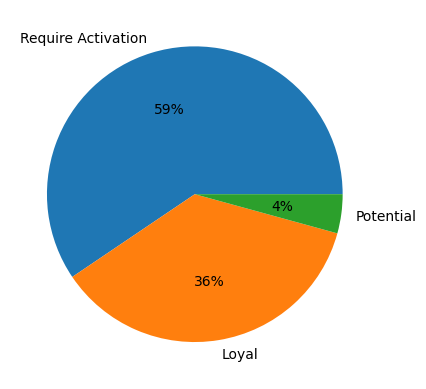

In [ ]:
plt.pie(df.RFM_Level.value_counts(),
        labels=df.RFM_Level.value_counts().index,
        autopct='%.0f%%')
plt.show()